Features and Terminology:
In stock trading, the high and low refer to the maximum and minimum prices in a given time period. Open and close are the prices at which a stock began and ended trading in the same period. Volume is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
#import plotly.express as px
from statsmodels.graphics import tsaplots
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from yahoo_fin.stock_info import get_data


In [137]:
#df = pd.read_csv('yahoo_stock.csv', parse_dates = ['Date'], index_col = 'Date')
df = get_data("^GSPC")
df = df.drop('ticker', axis=1)
df.head()

,open,high,low,close,adjclose,volume
1970-03-25,0.0,91.070000,88.110001,89.769997,89.769997,17500000
1970-03-26,0.0,90.650002,89.180000,89.919998,89.919998,11350000
1970-03-30,0.0,90.410004,88.910004,89.629997,89.629997,9600000
1970-03-31,0.0,90.169998,88.849998,89.629997,89.629997,8370000
1970-04-01,0.0,90.620003,89.300003,90.070000,90.070000,9810000


In [138]:
df.describe()

,open,high,low,close,adjclose,volume
count,13517.000000,13517.000000,13517.000000,13517.000000,13517.000000,1.351700e+04
mean,1020.250258,1049.433958,1036.486135,1043.366805,1043.366805,1.568717e+09
std,1113.301879,1099.040507,1086.363873,1093.057193,1093.057193,1.866442e+09
min,0.000000,63.230000,60.959999,62.279999,62.279999,0.000000e+00
25%,156.820007,158.050003,156.339996,156.860001,156.860001,7.996000e+07
50%,740.739990,746.989990,735.150024,742.159973,742.159973,4.630300e+08
75%,1388.910034,1399.099976,1378.020020,1389.810059,1389.810059,3.259290e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


Ploting the time series

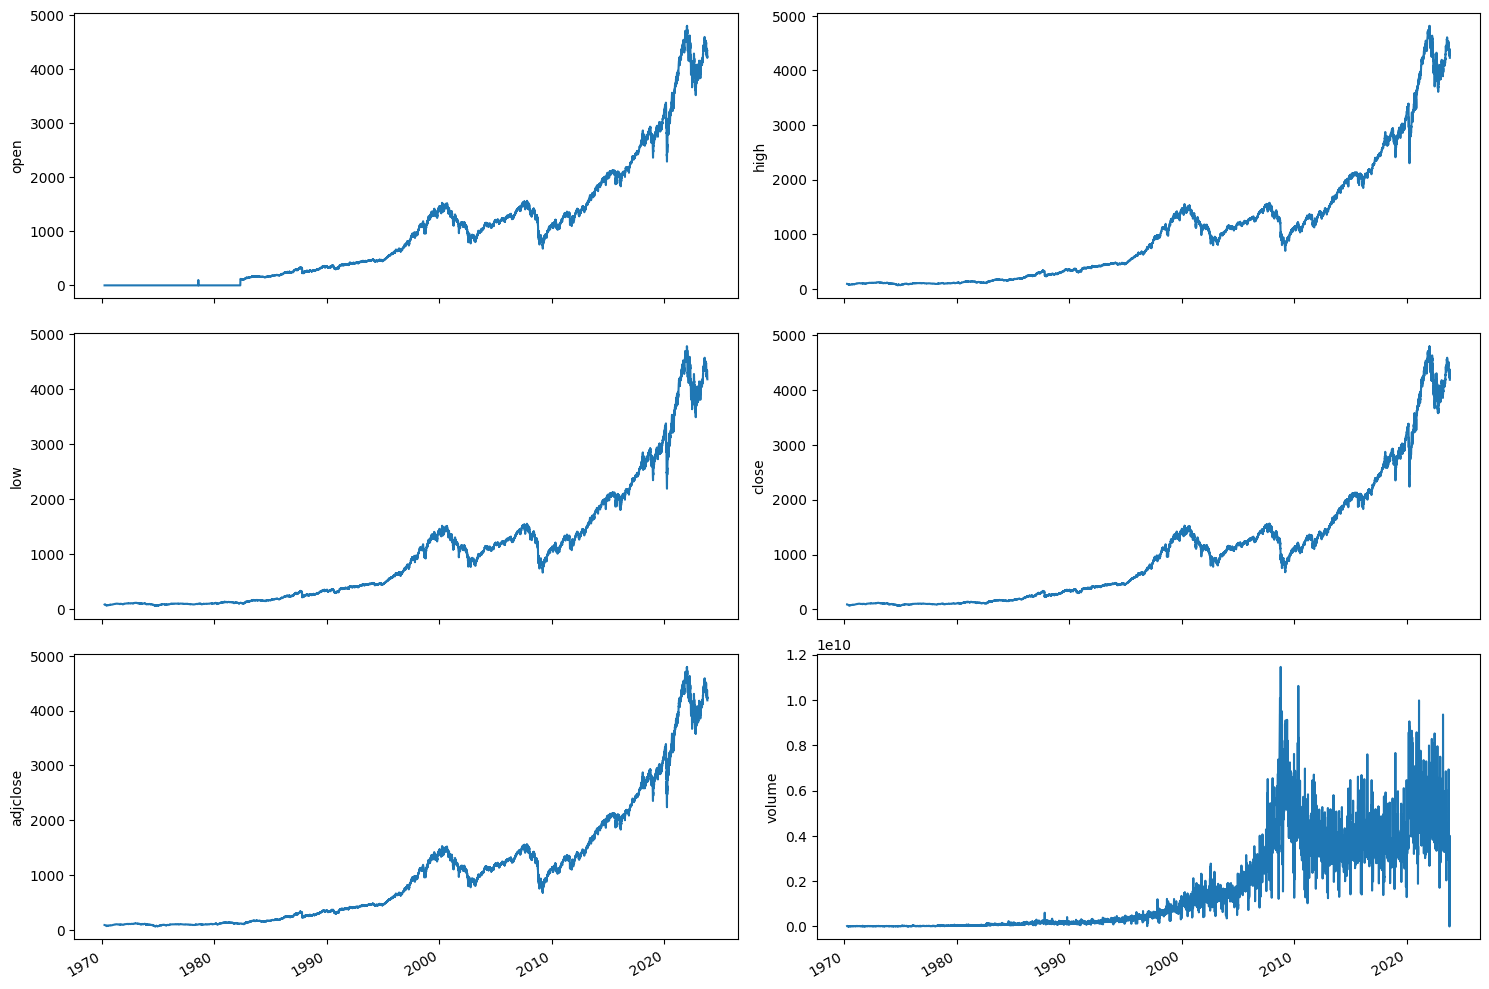

In [139]:
#df.plot(x='Date',y=var)

labels = df.columns.values

plt.figure(figsize=(15,10))
p = 1
for label in labels:
    #plt.scatter(df['Date'],df[label])
    plt.subplot(3,2,p)
    p +=1
    plt.plot(df.index,df[label])
    plt.ylabel(label)
    date_format = mdates.DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

Removing weekends

In [140]:
#df = df[df.index.weekday < 5]

Chossing variable to study

In [141]:
var = 'adjclose'

Decomposing the time series

In [142]:
def seasonal_decomposition(df, column_name):

    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend='freq')
    result_add = seasonal_decompose(df[column_name], model='additive', extrapolate_trend='freq')
    
    return result_mul, result_add

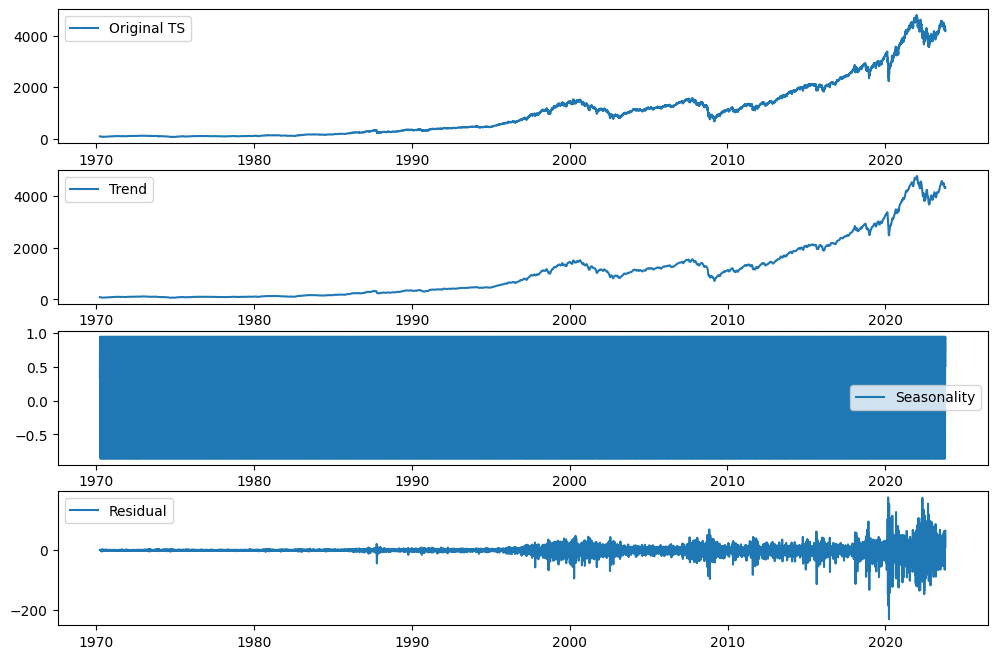

In [143]:
decompose_add=seasonal_decompose(df[var], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df[var], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')
plt.show()


Lag plots

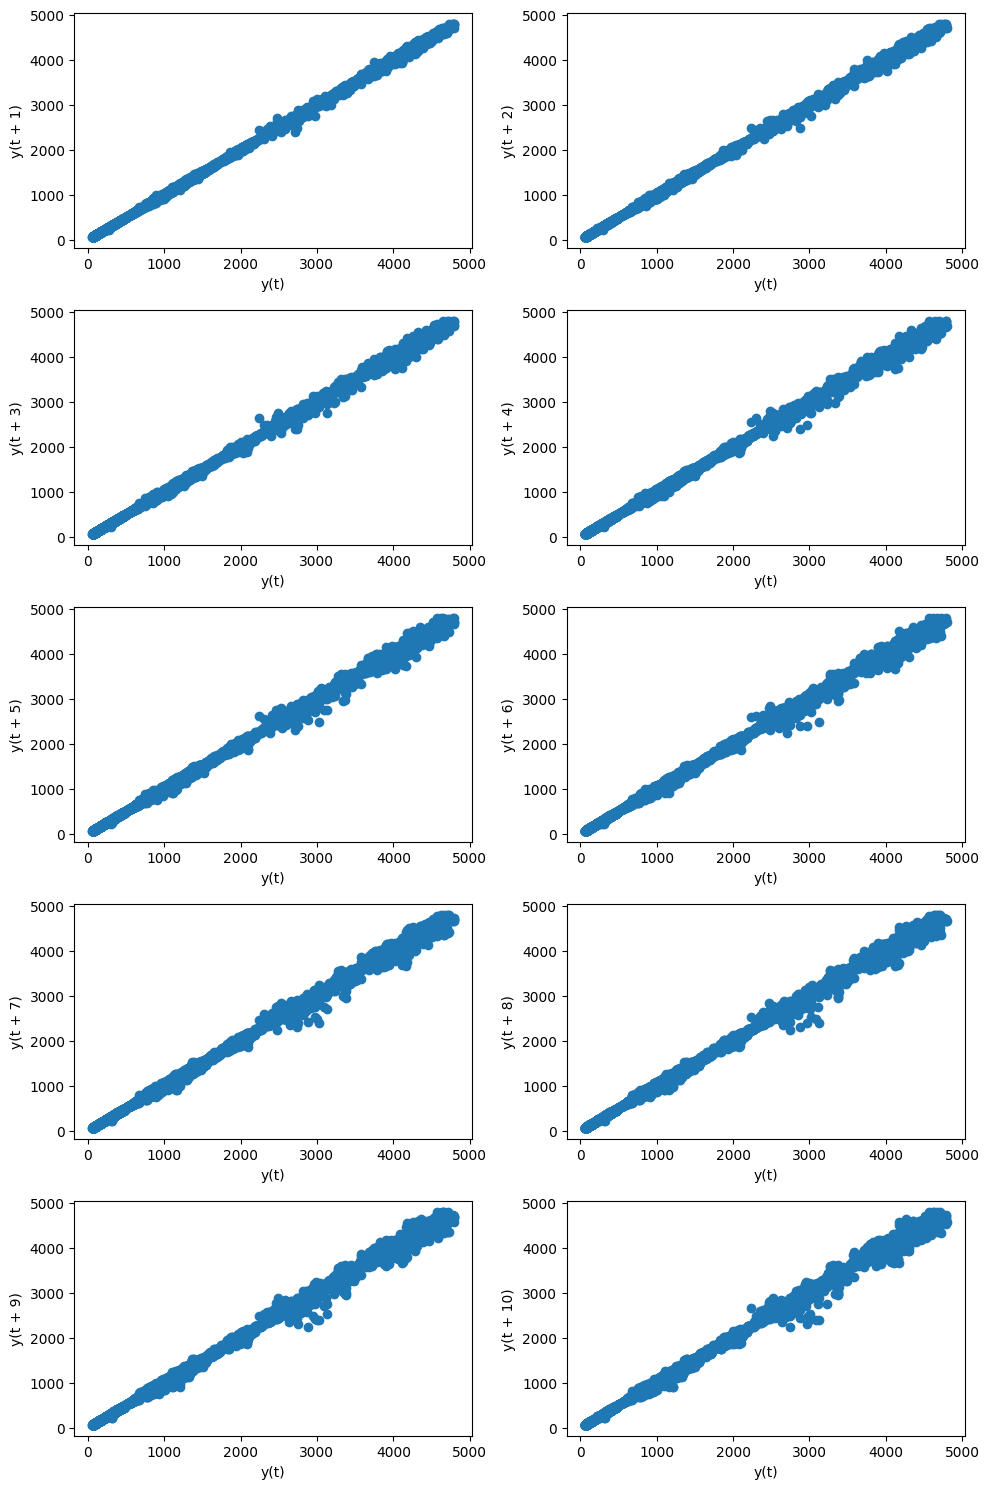

In [144]:
plt.figure(figsize=(10,15))
for i in range(1,11):
    plt.subplot(5,2,i)
    pd.plotting.lag_plot(df[var],lag=i)

plt.tight_layout()
plt.show()


ACF Plot

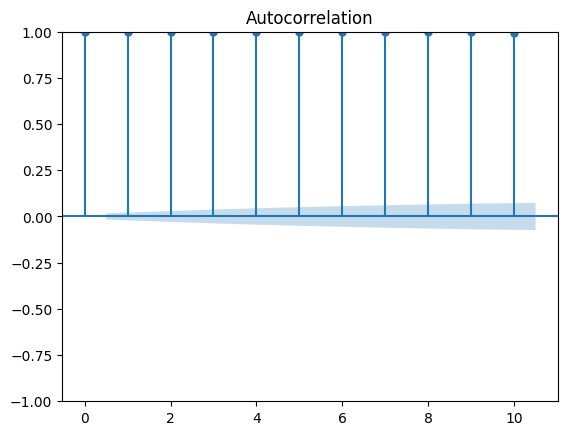

In [145]:
acf= sm.tsa.acf(df[var])
fig = tsaplots.plot_acf(df[var], lags=10)
plt.show()

Analysing the daily difference

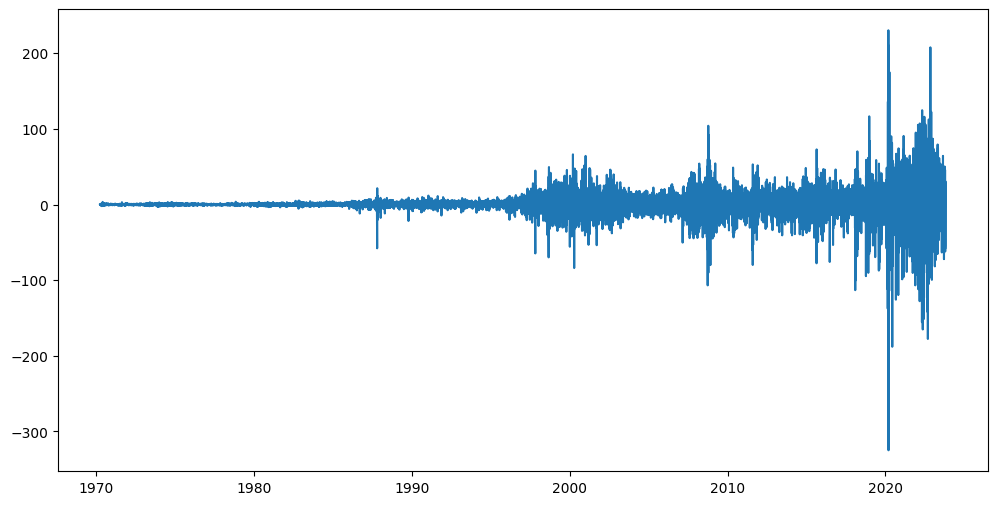

In [146]:
daily_diff = df.diff()

plt.figure(figsize=(12,6))
#plt.scatter(monthly_diff.index,monthly_diff[var])
plt.plot(daily_diff.index,daily_diff[var])
plt.show()

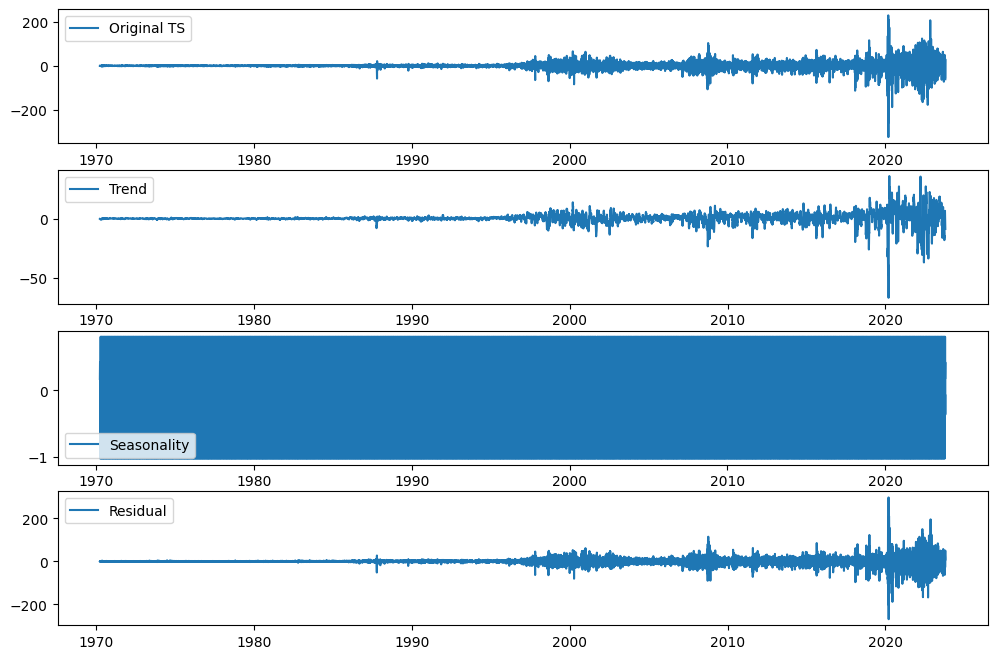

In [147]:
decompose_add=seasonal_decompose(daily_diff[var][1:], model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(daily_diff[var], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')
plt.show()

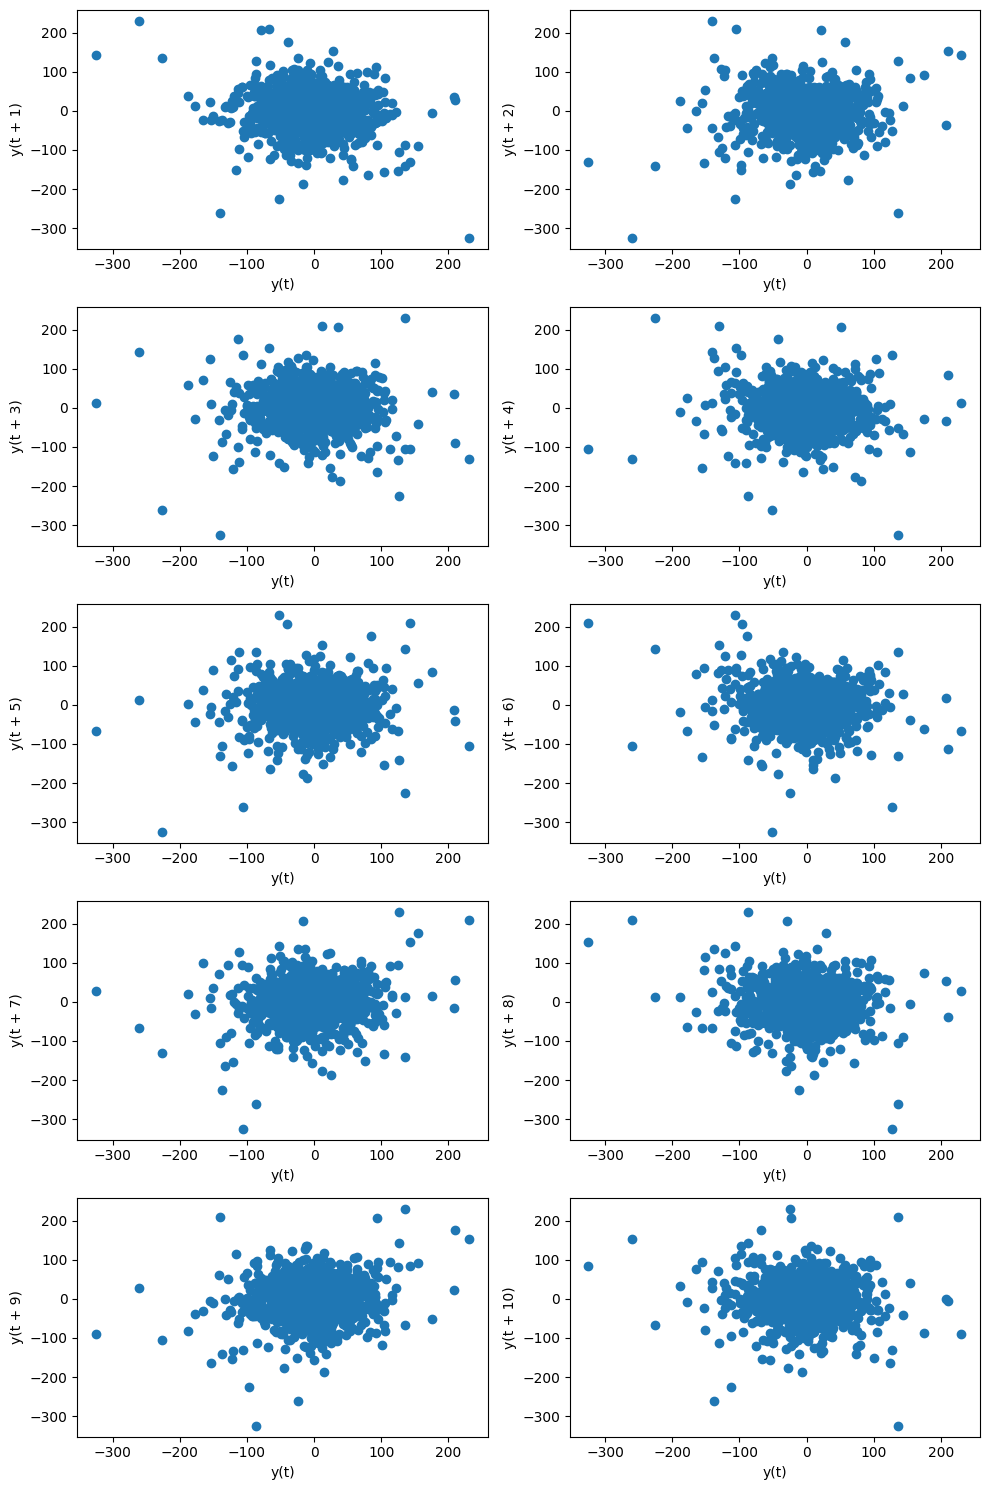

In [148]:
plt.figure(figsize=(10,15))
for i in range(1,11):
    plt.subplot(5,2,i)
    pd.plotting.lag_plot(daily_diff[var],lag=i)

plt.tight_layout()
plt.show()

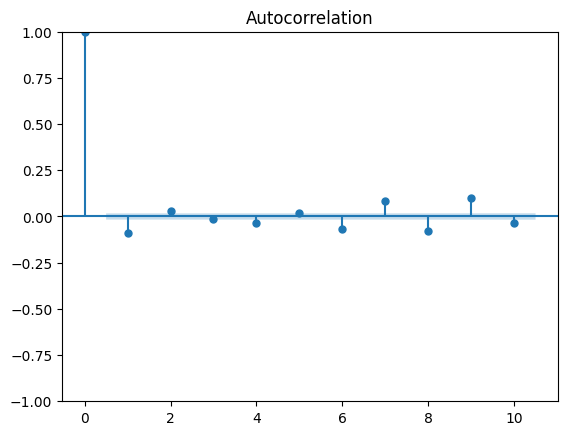

In [149]:
acf= sm.tsa.acf(daily_diff[var][1:])
fig = tsaplots.plot_acf(daily_diff[var][1:], lags=10)
plt.show()

Analysing the data monthly

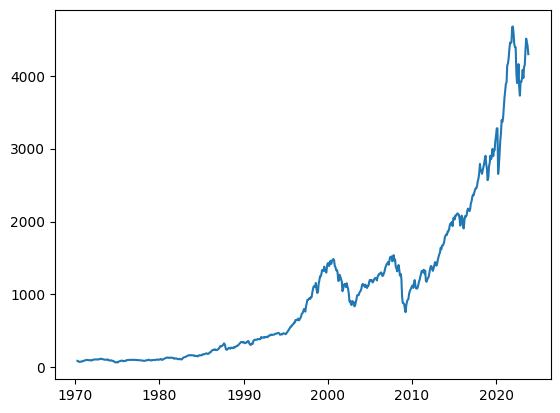

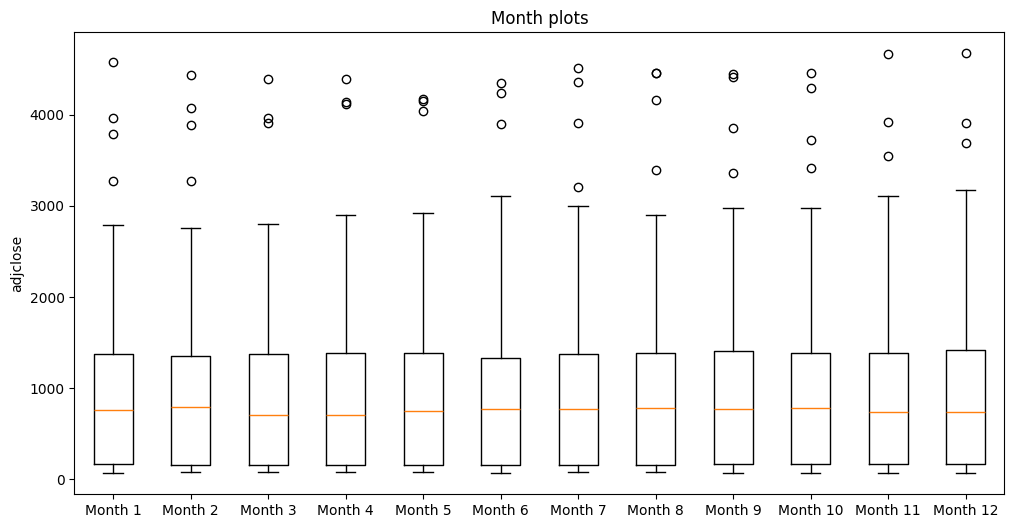

In [150]:
monthly_data = df.resample('M').mean()

plt.plot(monthly_data.index,monthly_data[var])
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

data_boxplots = [group[var].values for month, group in monthly_data.groupby(monthly_data.index.month)]

ax.boxplot(data_boxplots, labels=[f'Month {month}' for month in range(1, 13)])
ax.set_ylabel(var)
ax.set_title('Month plots')

plt.show()


The evolution of the monthly difference

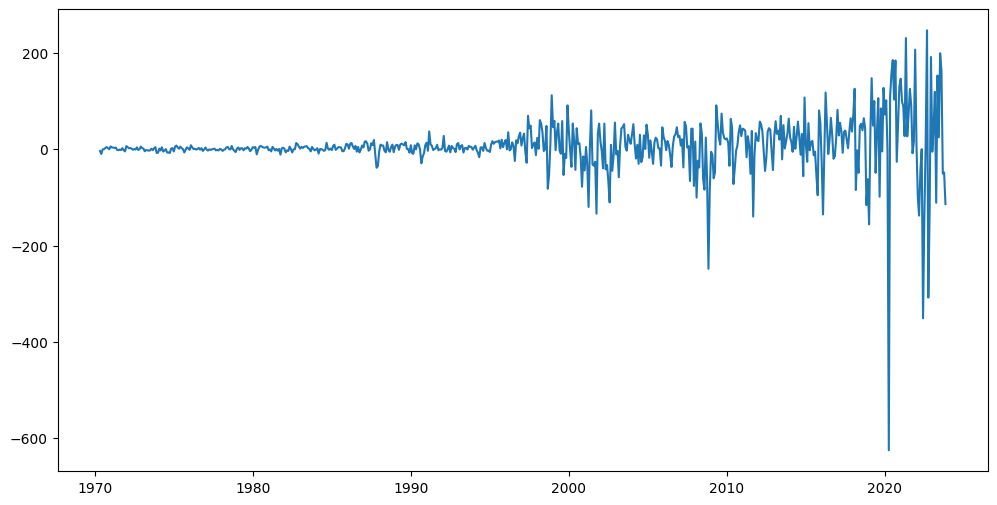

In [151]:
monthly_diff = monthly_data.diff()

plt.figure(figsize=(12,6))
#plt.scatter(monthly_diff.index,monthly_diff[var])
plt.plot(monthly_diff.index,monthly_diff[var])
plt.show()

Analysing the box-cox trangormation

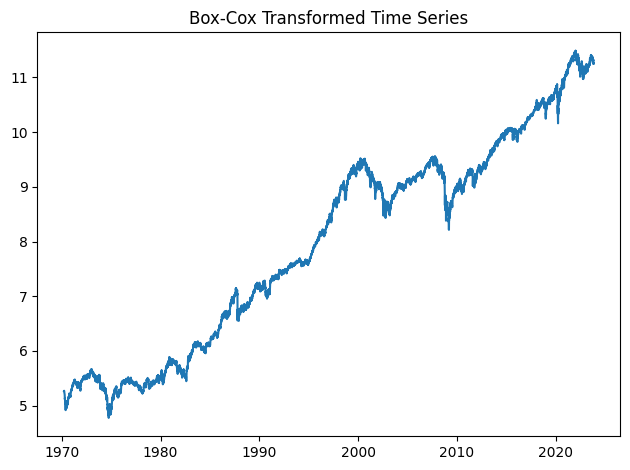

Optimal lambda value: 0.06846226348469892


In [152]:
transformed_values, lambda_value = boxcox(df[var])

plt.plot(df.index, transformed_values)
plt.title('Box-Cox Transformed Time Series')

plt.tight_layout()
plt.show()

print(f'Optimal lambda value: {lambda_value}')

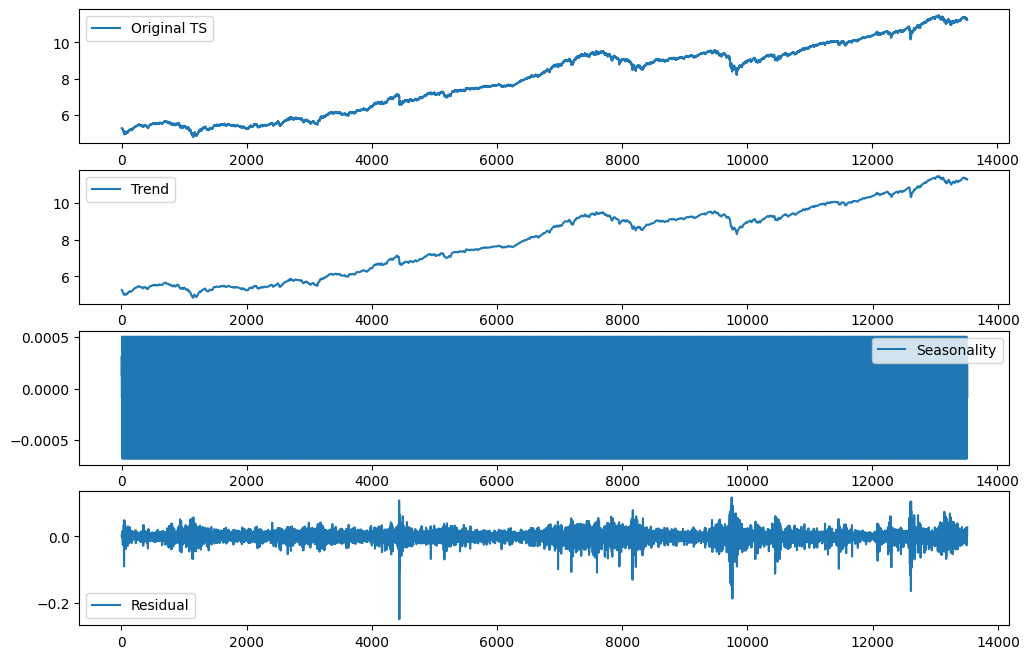

In [153]:
decompose_add=seasonal_decompose(transformed_values, model='additive', period=12)
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(transformed_values, label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

plt.show()

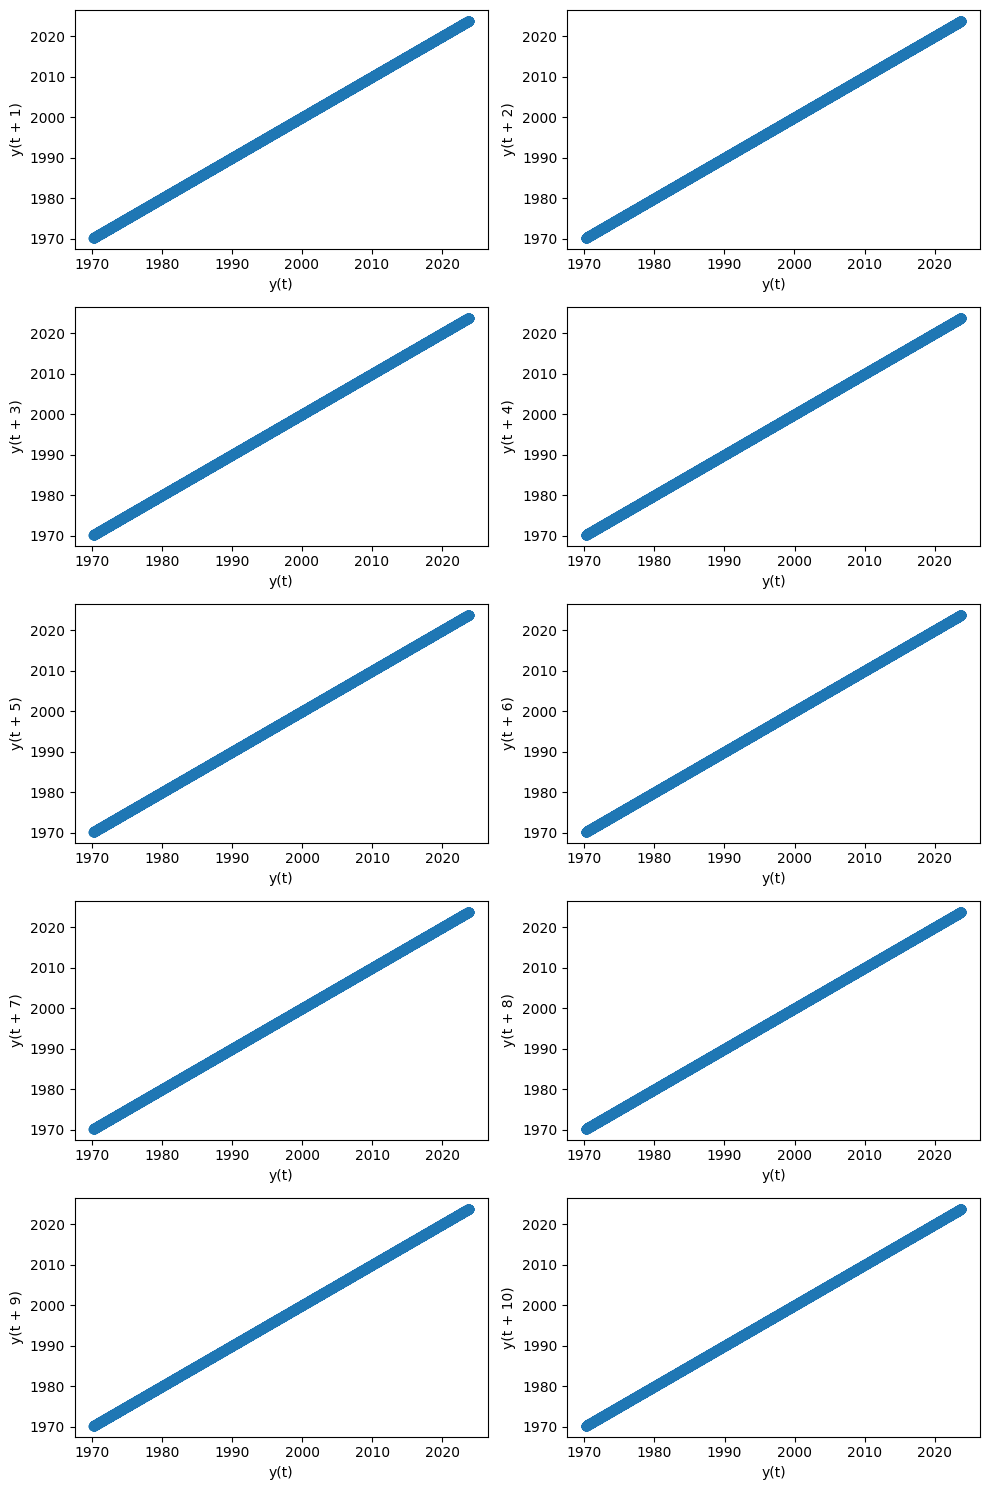

In [154]:
transformed_df = pd.Series(df.index,transformed_values)

plt.figure(figsize=(10,15))
for i in range(1,11):
    plt.subplot(5,2,i)
    pd.plotting.lag_plot(transformed_df,lag=i)

plt.tight_layout()
plt.show()

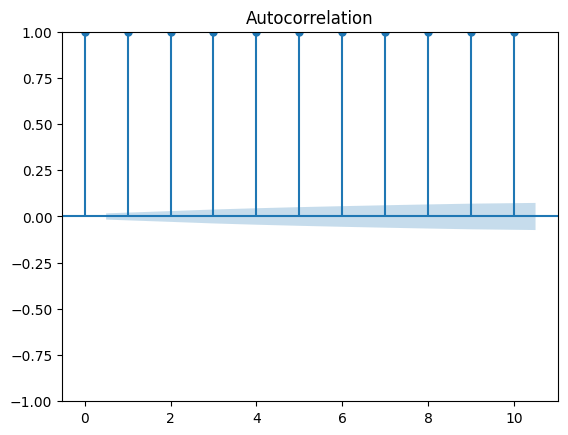

In [155]:
acf= sm.tsa.acf(transformed_values)
fig = tsaplots.plot_acf(transformed_values, lags=10)
plt.show()